# QF600 Question 4

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_ind_raw = pd.read_excel('Industry_Portfolios.xlsx')
data_ind = data_ind_raw.drop("Date", axis = 1)
data_mkt_raw = pd.read_excel('Market_Portfolio.xlsx')
data_mkt = data_mkt_raw.drop("Date", axis = 1)

# Part 1: Minimum Tracking-Error Frontier

# Key Statistics

In [3]:
# calculate expected return deviation
data = pd.DataFrame(np.array(data_ind) - np.array(data_mkt), columns=data_ind.columns)

In [4]:
# mean returns 
muvec = data.mean(); muvec

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

In [5]:
# standard deviation
sigmavec = data.std(); sigmavec

NoDur    2.332316
Durbl    5.160320
Manuf    1.717702
Enrgy    4.390320
HiTec    2.258040
Telcm    2.163924
Shops    2.110125
Hlth     2.796506
Utils    3.502496
Other    2.122075
dtype: float64

In [6]:
# mean & standard deviation summary
pd.merge(pd.DataFrame(muvec,columns=["Mean Returns"]),
         pd.DataFrame(sigmavec,columns=["Standard Deviation"]),
         left_index=True, right_index=True)

,Mean Returns,Standard Deviation
NoDur,0.154750,2.332316
Durbl,-0.014750,5.160320
Manuf,0.264750,1.717702
Enrgy,0.483083,4.390320
HiTec,0.018167,2.258040
Telcm,0.133333,2.163924
Shops,0.168250,2.110125
Hlth,0.035750,2.796506
Utils,0.159083,3.502496
Other,-0.259000,2.122075


In [7]:
# covariance matrix
cov = np.cov(data, rowvar=False)
display(np.round(data.cov(), decimals=5))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.43970,-6.07304,-1.39619,-1.20053,-1.88315,1.53888,1.14074,3.81514,4.27200,-1.76874
Durbl,-6.07304,26.62890,4.90802,-3.48105,1.89158,-1.70763,-0.35434,-8.08295,-9.61749,4.38587
Manuf,-1.39619,4.90802,2.95050,1.66613,0.06527,-0.62642,-1.15460,-2.28890,-1.90141,0.35890
Enrgy,-1.20053,-3.48105,1.66613,19.27491,-1.51697,-1.04052,-3.71044,-2.48580,4.45437,-3.86483
HiTec,-1.88315,1.89158,0.06527,-1.51697,5.09875,-0.77329,-0.24535,-1.93628,-2.34284,-1.40405
Telcm,1.53888,-1.70763,-0.62642,-1.04052,-0.77329,4.68257,0.46380,0.69316,2.72148,-1.27178
Shops,1.14074,-0.35434,-1.15460,-3.71044,-0.24535,0.46380,4.45263,0.76451,-0.17667,-0.25699
Hlth,3.81514,-8.08295,-2.28890,-2.48580,-1.93628,0.69316,0.76451,7.82045,3.49614,-1.72684
Utils,4.27200,-9.61749,-1.90141,4.45437,-2.34284,2.72148,-0.17667,3.49614,12.26748,-4.05511
Other,-1.76874,4.38587,0.35890,-3.86483,-1.40405,-1.27178,-0.25699,-1.72684,-4.05511,4.50320


# Variables

In [8]:
# V-1 = inverse matrix of covariance
vinv = np.linalg.inv(cov)

# R = vector of mean returns 
muVEC = muvec

# e = n x 1 vector of ones
ones = np.ones(len(muvec))

# delta = δ = e′V−1e
delta = ones.T@vinv@ones

# alpha = α = R′V−1e
alpha = muVEC.T@vinv@ones

# zeta = ζ = R′V−1R
zeta = muvec.T@vinv@muvec

# a = 1st unknown for weights 
a = (zeta*vinv@ones - alpha*vinv@muvec)/(zeta*delta-alpha**2)

# b = 2nd unknown for weights
b = (delta*vinv@muvec - alpha*vinv@ones)/(zeta*delta-alpha**2)

# Minimum Tracking-Error Portfolio (MTE)

In [9]:
# minimum traacking-error portfolio returns
muMTE = alpha/delta; muMTE

0.05007882397540081

In [10]:
# minimum traacking-error portfolio standard deviation
sigmaMTE = (1/delta)**0.5; sigmaMTE

0.13068796844698796

In [11]:
# minimum tracking-error portfolio weights
wMTE = a+b*muMTE
display(pd.DataFrame(wMTE.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.051633,0.004434,0.102194,0.085484,0.191218,0.068873,0.090406,0.105534,0.047645,0.252578


# Minimum Tracking-Error Frontier (MTEF)

In [12]:
# minimum tracking-error frontier portfolios returns
muMTEF = np.arange(0, 0.105 , 0.005); muMTEF

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

In [13]:
# minimum tracking-error frontier portfolios standard deviation
sigmaMTEF = ((1/delta)+(delta/(zeta*delta-alpha**2))*(muMTEF-muMTE)**2)**0.5; sigmaMTEF

array([0.24573951, 0.22841092, 0.21170414, 0.19577839, 0.18084016,
       0.16715441, 0.15505313, 0.14493377, 0.13723545, 0.13238122,
       0.13068838, 0.13227836, 0.13703694, 0.14465174, 0.15470158,
       0.16674674, 0.18038797, 0.19529109, 0.21118913, 0.22787394,
       0.24518496])

In [14]:
# minimum tracking-error frontier data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muMTEF, columns=["Returns"]), 
           pd.DataFrame(sigmaMTEF, columns=["Standard Deviation"])), 
           axis = 1)

,Returns,Standard Deviation
0,0.000,0.245740
1,0.005,0.228411
2,0.010,0.211704
3,0.015,0.195778
4,0.020,0.180840
5,0.025,0.167154
6,0.030,0.155053
7,0.035,0.144934
8,0.040,0.137235
9,0.045,0.132381


### Plot the Minimum Tracking-Error Portfolio (MTE) & Minimum Tracking-Error Frontier (MTEF)

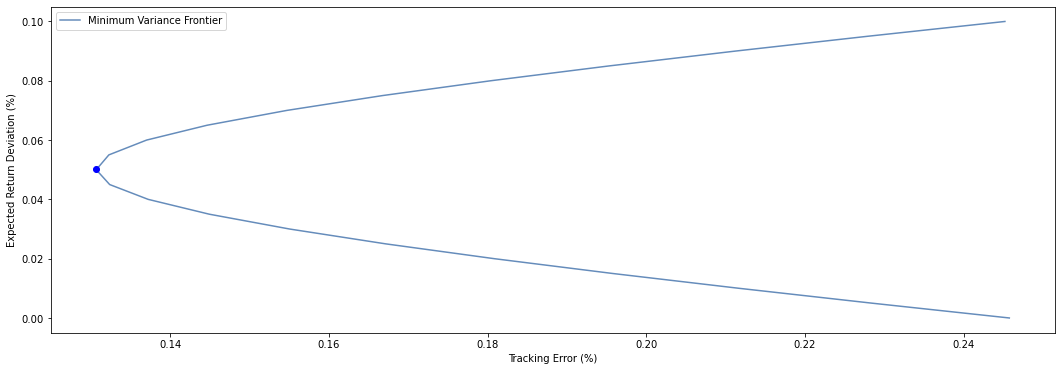

In [15]:
plt.figure(figsize = (18, 6))
plt.plot(sigmaMTEF, muMTEF, 'xkcd:faded blue')
plt.plot(sigmaMTE, muMTE, 'bo')

plt.ylabel('Expected Return Deviation (%)')
plt.xlabel('Tracking Error (%)')
plt.legend(["Minimum Variance Frontier"], loc = 2)

# Tangency Portfolio (TAN)

In [16]:
# tangency portfolio returns
muTAN = ((alpha*0)-zeta)/((delta*0)-alpha); muTAN

0.06982811859065596

In [17]:
# tangency portfolio standard deviation
sigmaTAN = -(zeta-2*alpha*0+(delta*0**2))**0.5/(delta*(0-muMTE)); sigmaTAN

0.15432053366443643

In [18]:
#tangency portfolio weights
wTAN = a+b*muTAN
display(pd.DataFrame(wTAN.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.052634,0.000153,0.137627,0.087032,0.179353,0.071074,0.106884,0.102776,0.040162,0.222304


In [19]:
# tangency portfolio information ratio
irTAN = (zeta-2*alpha*0+delta*0**2)**0.5 ; irTAN

0.45248753961993354

# Tangency Line (TL)

In [20]:
# tangency line returns
muTL = np.arange(0, 0.105, 0.1); muTL

array([0. , 0.1])

In [21]:
# tangency line standard deviation
sigmaTL = ((muTL-0)**2/(zeta-2*alpha*0+delta*0**2))**0.5; sigmaTL

array([0.        , 0.22100056])

In [22]:
# tangency line data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muTL, columns=["Returns"]), 
           pd.DataFrame(sigmaTL, columns=["Standard Deviation"])), 
           axis = 1)

,Returns,Standard Deviation
0,0.0,0.000000
1,0.1,0.221001


## Plot the Tangency Portfolio (TAN) & Tangency Line (TL)

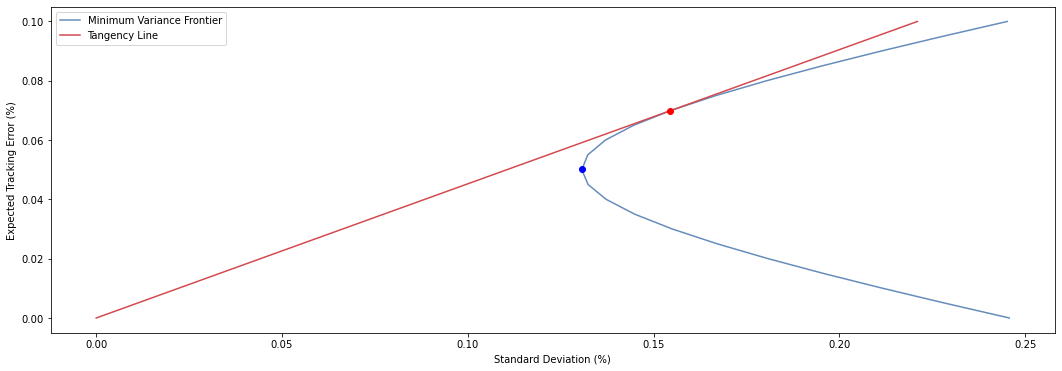

In [23]:
plt.figure(figsize = (18, 6))
plt.plot(sigmaMTEF, muMTEF, 'xkcd:faded blue')
plt.plot(sigmaTL, muTL,'xkcd:faded red')
plt.plot(sigmaMTE, muMTE, 'bo')
plt.plot(sigmaTAN, muTAN, 'ro')

plt.ylabel('Expected Tracking Error (%)')
plt.xlabel('Standard Deviation (%)')
plt.legend(["Minimum Variance Frontier", "Tangency Line"], loc=2)

# Part 2: Minimum Variance Frontier (Without Short Sales)

# Normal Weights

Text(0, 0.5, 'Expected Return (%)')

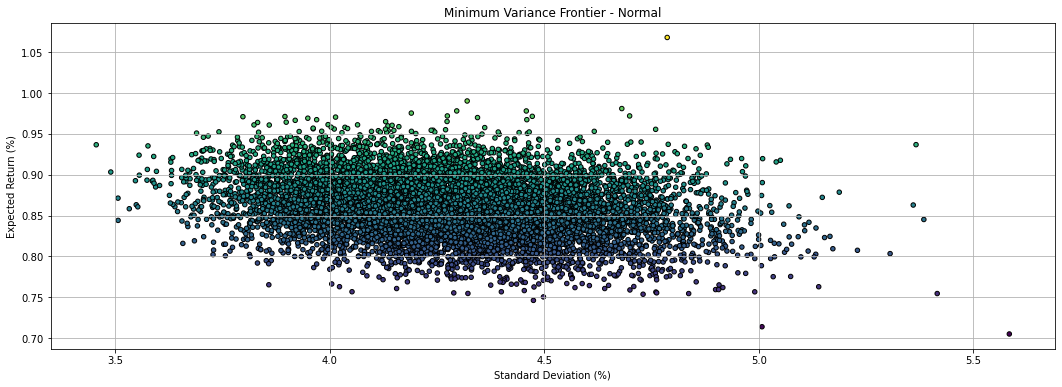

In [24]:
# normal weights
port_return_normal = []
port_standard_deviation_normal = []
for f in range(10000):
    weight_normal = np.random.uniform(0,1,10)
    weight_normal /= np.sum(weight_normal)
    return_normal = np.dot(weight_normal,np.mean(data_ind))  
    standard_deviation_normal = np.sqrt(np.dot(weight_normal.T,np.dot(data_ind.cov(),weight_normal)))
    port_return_normal.append(return_normal)
    port_standard_deviation_normal.append(standard_deviation_normal)
    
portfolio_normal = {'port_return_normal':port_return_normal,
                    'port_standard_deviation_normal':port_standard_deviation_normal}
MVF_normal = pd.DataFrame(portfolio_normal)

MVF_normal.plot.scatter(x = 'port_standard_deviation_normal',y = 'port_return_normal', 
                        edgecolors = 'black', figsize = (18, 6), grid = True, cmap = 'viridis', c = port_return_normal)

plt.title('Minimum Variance Frontier - Normal')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Expected Return (%)')

# Inverse Weights

Text(0, 0.5, 'Expected Return (%)')

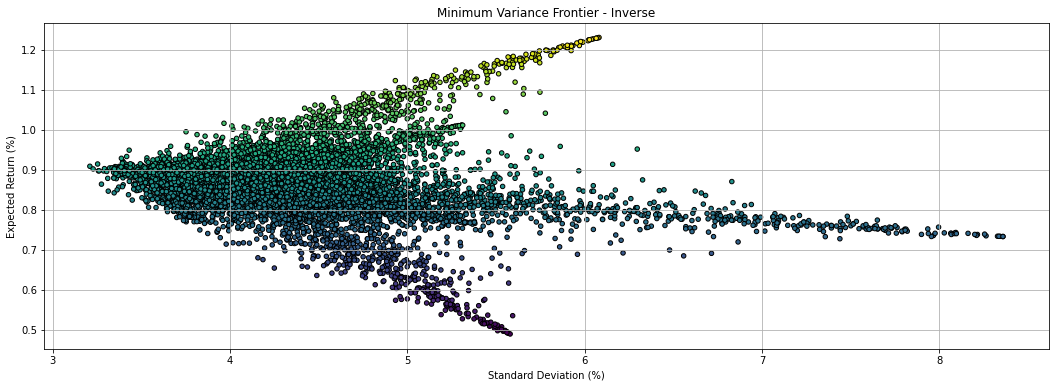

In [25]:
# inverse weights
port_return_inverse = []
port_standard_deviation_inverse = []
for f in range(10000):
    weight_inverse = np.random.uniform(0,1,10)
    weight_inverse = 1/weight_inverse
    weight_inverse /= np.sum(weight_inverse)
    return_inverse = np.dot(weight_inverse,np.mean(data_ind))  
    standard_deviation_inverse = np.sqrt(np.dot(weight_inverse.T,np.dot(data_ind.cov(),weight_inverse)))
    port_return_inverse.append(return_inverse)
    port_standard_deviation_inverse.append(standard_deviation_inverse)
    
portfolio_inverse = {'port_return_inverse':port_return_inverse,
                     'port_standard_deviation_inverse':port_standard_deviation_inverse}
MVF_inverse = pd.DataFrame(portfolio_inverse)

MVF_inverse.plot.scatter(x = 'port_standard_deviation_inverse',y = 'port_return_inverse', 
                         edgecolors = 'black', figsize = (18, 6), grid = True, cmap = 'viridis', c = port_return_inverse)

plt.title('Minimum Variance Frontier - Inverse')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Expected Return (%)')